In [3]:
import pandas as pd #library

In [5]:
dataset=pd.read_csv("insurance_pre.csv")

In [7]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [9]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [11]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [13]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [21]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [25]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [27]:
dependent=dataset[['charges']]

In [123]:
from sklearn.model_selection import train_test_split #through sklearn train and test takes place
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)


In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [115]:
from sklearn.svm import SVR
regressor=SVR(kernel="sigmoid")
regressor.fit(X_train,Y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

In [195]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best')
regressor=regressor.fit(X_train,Y_train)

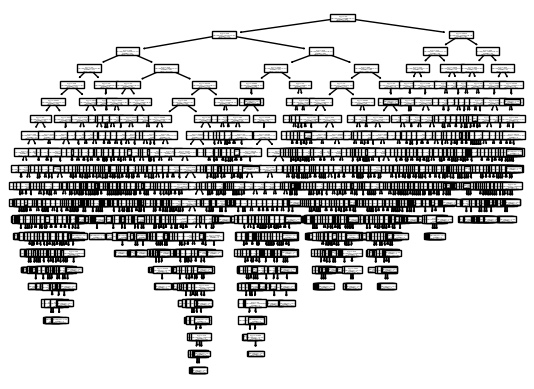

In [61]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [203]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor( n_estimators = 50, random_state = 0)
regressor.fit(X_train,Y_train)

C:\Anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50, random_state=0)

In [205]:
y_pred=regressor.predict(X_test)

In [207]:
from sklearn.metrics import r2_score #r_score and adjusted r2_score takes place
r_score=r2_score(Y_test,y_pred)

In [209]:
r_score 

0.8498329315421834

In [85]:
import pickle 
filename="finalized_model_Forest.sav"

In [87]:
pickle.dump(regressor,open(filename,'wb'))

In [89]:
loaded_model=pickle.load(open("finalized_model_Forest.sav",'rb')) #loading the final model and prediction
result=loaded_model.predict([[1234,345,4565,1,0]]) #5 numbers for prediction as it has 5 inputs

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [91]:
result

array([27994.4061844])